In [164]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from src.utils.kpt_utils import get_active_kpts, get_image_patches, kpts_2_img_coordinates

In [165]:
sample = torch.load('/home/yannik/vssil/eval/ulosd_simitate_stack_128pix/ulosd_sample_2/sample.pt')
kpts = torch.load('/home/yannik/vssil/eval/ulosd_simitate_stack_128pix/ulosd_sample_2/key_points.pt')
patches = torch.load('/home/yannik/vssil/eval/ulosd_simitate_stack_128pix/ulosd_sample_2/patches.pt')
N, T, C, H, W = sample.shape
print(sample.shape)
print(kpts.shape)
print(patches.shape)

torch.Size([1, 30, 3, 128, 128])
torch.Size([1, 30, 48, 3])
torch.Size([1, 30, 48, 3, 12, 12])


In [166]:
active_kpts = get_active_kpts(kpts, 0.5)
# Adapt
active_kpts[..., :2] *= -1 
K, D = active_kpts.shape[-2:]
active_img_coordinates = kpts_2_img_coordinates(active_kpts, (H, W))
print(active_kpts.shape)

torch.Size([1, 30, 26, 3])


In [167]:
# Processing key-points by grouping
grouped_img_coordinates = None
l = 2
for i in range(0, active_img_coordinates.shape[2] - l, l):
    group = torch.mean(active_img_coordinates[0:1, :, i:i+l, :], dim=2).unsqueeze(-2)
    grouped_img_coordinates = group if grouped_img_coordinates is None else torch.cat([grouped_img_coordinates, group], dim=-2)
    print(group.shape)
print(grouped_img_coordinates.shape)

torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 1, 3])
torch.Size([1, 30, 12, 3])


In [168]:
active_kpt_patches = get_image_patches(sample, active_kpts, (15, 15))
Hp, Wp = active_kpt_patches.shape[-2:]
print(active_kpt_patches.shape)

torch.Size([1, 30, 26, 3, 15, 15])


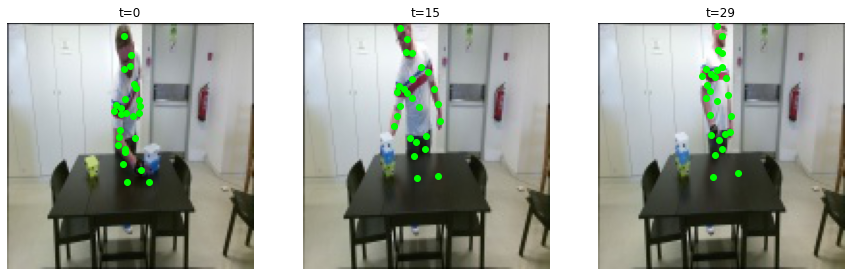

In [169]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, t in enumerate([0, 15, 29]):
    ax[i].imshow(sample[0, t].permute(1, 2, 0))
    ax[i].set_title(f"t={t}")
    ax[i].axis('off')
    
    ax[i].scatter(active_img_coordinates[0, t, :, 0], active_img_coordinates[0, t, :, 1], color='lime')

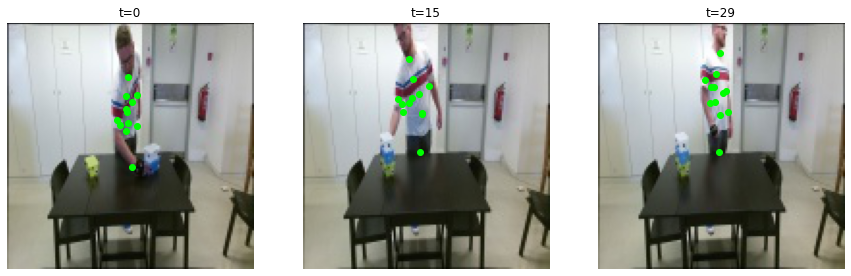

In [170]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, t in enumerate([0, 15, 29]):
    ax[i].imshow(sample[0, t].permute(1, 2, 0))
    ax[i].set_title(f"t={t}")
    ax[i].axis('off')
    
    ax[i].scatter(grouped_img_coordinates[0, t, :, 0], grouped_img_coordinates[0, t, :, 1], color='lime')

In [204]:
man_img_coordinates = torch.zeros((1, 30, 7, 3))
# Head
man_img_coordinates[0, 0, 0] = torch.tensor([60, 20, 1.0])
man_img_coordinates[0, 15, 0] = torch.tensor([50, 10, 1.0])
man_img_coordinates[0, 29, 0] = torch.tensor([65, 10, 1.0])
# Torso
man_img_coordinates[0, 0, 1] = torch.tensor([65, 45, 1.0])
man_img_coordinates[0, 15, 1] = torch.tensor([60, 40, 1.0])
man_img_coordinates[0, 29, 1] = torch.tensor([62, 37, 1.0])
# Left hand
man_img_coordinates[0, 0, 2] = torch.tensor([67, 47, 1.0])
man_img_coordinates[0, 15, 2] = torch.tensor([70, 50, 1.0])
man_img_coordinates[0, 29, 2] = torch.tensor([70, 57, 1.0])
# Right hand
man_img_coordinates[0, 0, 3] = torch.tensor([67, 75, 1.0])
man_img_coordinates[0, 15, 3] = torch.tensor([40, 70, 1.0])
man_img_coordinates[0, 29, 3] = torch.tensor([60, 55, 1.0])
# Box
man_img_coordinates[0, 0, 4] = torch.tensor([75, 70, 1.0])
man_img_coordinates[0, 15, 4] = torch.tensor([42, 67, 1.0])
man_img_coordinates[0, 29, 4] = torch.tensor([42, 67, 1.0])
# Left shoulder
man_img_coordinates[0, 0, 5] = torch.tensor([67, 22, 1.0])
man_img_coordinates[0, 15, 5] = torch.tensor([65, 20, 1.0])
man_img_coordinates[0, 29, 5] = torch.tensor([67, 22, 1.0])
# Right shoulder
man_img_coordinates[0, 0, 6] = torch.tensor([57, 40, 1.0])
man_img_coordinates[0, 15, 6] = torch.tensor([50, 30, 1.0])
man_img_coordinates[0, 29, 6] = torch.tensor([57, 22, 1.0])

In [205]:
font = {'family' : 'Sans',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

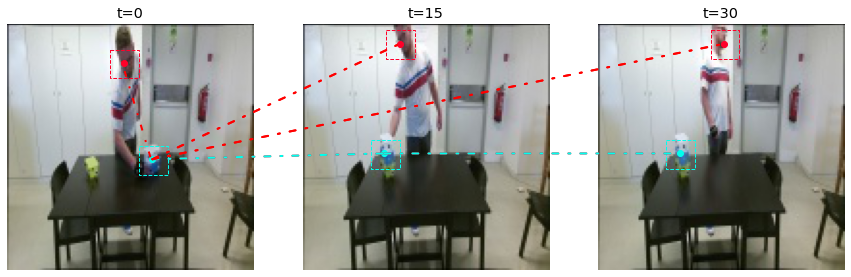

In [222]:
import pylab
from matplotlib.patches import Rectangle, ConnectionPatch
cm = pylab.get_cmap('gist_rainbow')

linestyle=(0, (3, 5, 1, 5))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ts = [0, 15, 29]
for i, t in enumerate(ts):
    ax[i].imshow(sample[0, t].permute(1, 2, 0))
    if t==29:
        ax[i].set_title(f"t=30")
    else:
        ax[i].set_title(f"t={t}")
    ax[i].axis('off')
    
    for k in range(man_img_coordinates.shape[2]):
        
        if k==4 and i==0:
            ax[i].plot(man_img_coordinates[0, t, [4, 0], 0]-1,
                       man_img_coordinates[0, t, [4, 0], 1]-1,
                       color='red',
                       linewidth=2.0,
                       linestyle=linestyle
                      )
        
        if k==4 or k==0:
            
            ax[i].scatter(man_img_coordinates[0, t, k, 0], man_img_coordinates[0, t, k, 1],
                      color=cm(1.*k/man_img_coordinates.shape[2]))
            
            rect = Rectangle((man_img_coordinates[0, t, k, 0] - 7, man_img_coordinates[0, t, k, 1] - 7),
                             width=15, height=15, fill=False, linestyle='--',
                             color=cm(1.*k/man_img_coordinates.shape[2]))
            ax[i].add_patch(rect)
            if i < 2:

                con = ConnectionPatch(xyA=man_img_coordinates[0, t, 4, :2],
                                      xyB=man_img_coordinates[0, ts[i+1], 4, :2],
                                      coordsA="data",
                                      coordsB="data",
                                      axesA=ax[i],
                                      axesB=ax[i+1],
                                      color=cm(1.*k/man_img_coordinates.shape[2]),
                                      linewidth=2.0,
                                      linestyle=linestyle
                                     )
                ax[i+1].add_artist(con)


            if i==0:
                con = ConnectionPatch(xyA=man_img_coordinates[0, t, 4, :2],
                                      xyB=man_img_coordinates[0, ts[i+1], 0, :2],
                                      coordsA="data",
                                      coordsB="data",
                                      axesA=ax[i],
                                      axesB=ax[i+1],
                                      color='red',
                                      linewidth=2.0,
                                      linestyle=linestyle
                                     )
                ax[i+1].add_artist(con)
                con = ConnectionPatch(xyA=man_img_coordinates[0, t, 4, :2],
                                      xyB=man_img_coordinates[0, ts[i+2], 0, :2],
                                      coordsA="data",
                                      coordsB="data",
                                      axesA=ax[i],
                                      axesB=ax[i+2],
                                      color='red',
                                      linewidth=2.0,
                                      linestyle=linestyle
                                     )
                ax[i+2].add_artist(con)
        
            
plt.savefig('/home/yannik/save/vis_diff.svg', bbox_inches='tight')

In [187]:
print(man_img_coordinates[0, t, 4, :2].cpu().numpy())


[42. 67.]
